# Competitive Inhibition Global Fitting

In [2]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats.distributions import t
import seaborn as sns
import matplotlib.pyplot as plt



Km is: 23.7 +/- 0.8
Vmax is: 18.6 +/- 0.1
Ki is: 4.6 +/- 0.1
R^2 is: 0.99861
Sum Squares is: 1.05


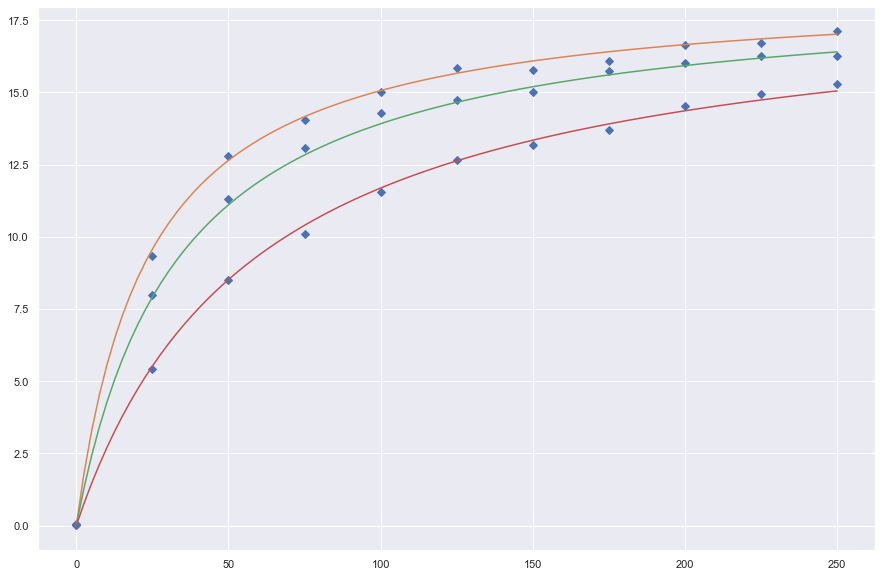

In [8]:
#substrate concentrations
x_1 = np.array([0,25,50,75,100,125,150,175,200,225,250])

#np.hstack combines all the arrays into a single one
comboX = np.hstack((x_1, x_1, x_1))

#initial velocity data
y_1 = np.array([0.04, 9.33, 12.81, 14.06, 15.02, 15.86, 15.76, 16.08, 16.65, 16.7, 17.11])
y_2 = np.array([0.01,7.98,11.32,13.07,14.29,14.72,15,15.75,16.01,16.27,16.25])
y_3 = np.array([0.02,5.43,8.49,10.08,11.56,12.66,13.18,13.7,14.52,14.94,15.29])

# np.hstack combines all the arrays into a single one
comboY = np.hstack((y_1, y_2, y_3))

#Inhibitor Concentrations
I1 = np.array([0])
I2 = np.array([2])
I3 = np.array([7])

if len(y_1) != len(x_1):
    raise(Exception('Unequal x1 and y1 data length'))
if len(y_2) != len(x_1):
    raise(Exception('Unequal x2 and y2 data length'))
if len(y_3) != len(x_1):
    raise(Exception('Unequal x3 and y3 data length'))  
    
def function(x, Km, Vmax, Ki, I): # Equation to fit competitive inhibition
    return (Vmax * x) / ((Km*(1+(I/Ki))) + x)

def combinedFunction(comboData, Km, Vmax, Ki):
    result1 = function(x_1, Km, Vmax, Ki, I1)
    result2 = function(x_1, Km, Vmax, Ki, I2)
    result3 = function(x_1, Km, Vmax, Ki, I3)
    return (np.hstack((result1, result2, result3)))

# some initial parameter values Km, Vmax, Ki
initialParameters = np.array([20, 20, 5])

# curve fit the combined data to the combined function
fittedParameters, pcov = curve_fit(combinedFunction, comboX, comboY, initialParameters, bounds = [[0,0,0], [100, 100, 100]])

residuals = comboY - combinedFunction(comboX, fittedParameters[0],fittedParameters[1],fittedParameters[2])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((comboY-np.mean(comboY))**2)
r_squared = 1 - (ss_res/ss_tot)

print ("")
print ("")
print ("Km is:", round(fittedParameters[0],1), "+/-", round(np.sqrt(pcov[0,0]),1))
print ("Vmax is:", round(fittedParameters[1],1),"+/-", round(np.sqrt(pcov[1,1]),1))
print ("Ki is:", round(fittedParameters[2],1),"+/-", round(np.sqrt(pcov[1,1]),1))
print ("R^2 is:", round(r_squared,5))
print ("Sum Squares is:", round(ss_res,2))

#values for display of fitted function
Km, Vmax, Ki = fittedParameters

xfit = np.linspace(0,250, 100)
xfit2 = np.linspace(0,250, 100)
xfit3 = np.linspace(0,250, 100)

y_fit_1 = function(xfit,fittedParameters[0],fittedParameters[1],fittedParameters[2], I1) # first data set, 
y_fit_2 = function(xfit,fittedParameters[0],fittedParameters[1],fittedParameters[2], I2) # second data set,
y_fit_3 = function(xfit,fittedParameters[0],fittedParameters[1], fittedParameters[2], I3) #third data set, 

sns.set()
plt.figure(figsize=(15,10))
plt.plot(comboX, comboY, 'D') # plot the raw data
plt.plot(xfit, y_fit_1) # plot the equation using the fitted parameters
plt.plot(xfit, y_fit_2) # plot the equation using the fitted parameters
plt.plot(xfit, y_fit_3) # plot the raw data
plt.show()

In [ ]:
#